In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UK_foods.csv',index_col='Unnamed: 0')
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


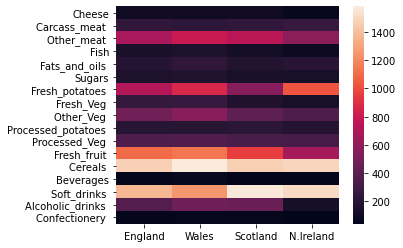

In [3]:
plt.figure(figsize=(5,4))
sns.heatmap(df)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [5]:
encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu'))
encoder.add(Dense(units=2,activation='relu'))

In [6]:
decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu'))
decoder.add(Dense(units=17,activation='relu'))

In [7]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer='adam')

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaled_df = scaler.fit_transform(df.transpose().values)
scaled_df.shape

(4, 17)

In [11]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15
1/1 [==============================] - 1s 505ms/step - loss: 0.4275
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4275
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4275
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.4275
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4275
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4275
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4275
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4275
Epoch 9/15
1/1 [==============================] - 0s 14ms/step - loss: 0.4275
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4275
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4275
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4275
Epoch 13/15
1/1 [==============================] - 0s 4ms/step - loss:

In [12]:
encoded_2dim = encoder.predict(scaled_df)
encoded_2dim

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [13]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [14]:
#join the data(from calculated reduced dimensions) of the countries
results = pd.DataFrame(data=encoded_2dim,index=df.transpose().index,
                      columns=['C1','C2'])

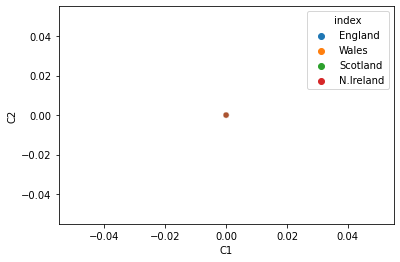

In [15]:
results = results.reset_index()
sns.scatterplot(x='C1',y='C2',data=results,hue='index',alpha=0.6)